In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Admin/IPL'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:/Users/Admin/IPL\IPL.ipynb
C:/Users/Admin/IPL\Match.csv
C:/Users/Admin/IPL\Player.csv
C:/Users/Admin/IPL\Team.csv
C:/Users/Admin/IPL\.ipynb_checkpoints\IPL-checkpoint.ipynb


In [2]:
df=pd.read_csv('C:/Users/Admin/IPL/Match.csv')

In [3]:
df.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


In [4]:
df.shape

(637, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 17 columns):
Match_SK        637 non-null int64
match_id        637 non-null int64
Team1           637 non-null object
Team2           637 non-null object
match_date      637 non-null object
Season_Year     637 non-null int64
Venue_Name      636 non-null object
City_Name       637 non-null object
Country_Name    637 non-null object
Toss_Winner     636 non-null object
match_winner    634 non-null object
Toss_Name       636 non-null object
Win_Type        635 non-null object
Outcome_Type    637 non-null object
ManOfMach       633 non-null object
Win_Margin      628 non-null float64
Country_id      637 non-null int64
dtypes: float64(1), int64(4), object(12)
memory usage: 84.7+ KB


In [6]:
# occurance of each team in Team1
df['Team1'].value_counts()

Royal Challengers Bangalore    85
Delhi Daredevils               76
Chennai Super Kings            74
Kings XI Punjab                72
Mumbai Indians                 72
Kolkata Knight Riders          69
Rajasthan Royals               52
Deccan Chargers                39
Sunrisers Hyderabad            38
Pune Warriors                  23
Gujarat Lions                  16
Rising Pune Supergiants        14
Kochi Tuskers Kerala            7
Name: Team1, dtype: int64

In [7]:
df['Team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants'], dtype=object)

In [8]:
df['Team1'].nunique()

13

In [9]:
# occurance of each team in Team2
df['Team2'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          79
Kings XI Punjab                76
Delhi Daredevils               71
Royal Challengers Bangalore    68
Rajasthan Royals               66
Chennai Super Kings            57
Sunrisers Hyderabad            39
Deccan Chargers                36
Pune Warriors                  23
Rising Pune Supergiants        16
Gujarat Lions                  14
Kochi Tuskers Kerala            7
Name: Team2, dtype: int64

In [10]:
df['Team2'].nunique()

13

In [11]:
df.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


In [12]:
# No of matches played by Royal Challegers Bangalore to other taem
df[df['Team1']=='Royal Challengers Bangalore']['Team2'].value_counts()

Mumbai Indians             13
Kings XI Punjab            11
Kolkata Knight Riders      11
Delhi Daredevils           10
Chennai Super Kings        10
Rajasthan Royals            9
Deccan Chargers             7
Sunrisers Hyderabad         6
Pune Warriors               3
Rising Pune Supergiants     2
Gujarat Lions               2
Kochi Tuskers Kerala        1
Name: Team2, dtype: int64

In [13]:
# Match result of RCB & MI
df[(df['Team1']=='Royal Challengers Bangalore') & (df['Team2']=='Mumbai Indians')]['match_winner'].value_counts()

Mumbai Indians                 9
Royal Challengers Bangalore    4
Name: match_winner, dtype: int64

In [14]:
# Result of each match 
df[(df['Team1']=='Royal Challengers Bangalore') & (df['Team2']=='Mumbai Indians')]


,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
30,30,336017,Royal Challengers Bangalore,Mumbai Indians,5/28/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Mumbai Indians,Mumbai Indians,field,wickets,Result,CRD Fernando,9.0,1
83,83,392213,Royal Challengers Bangalore,Mumbai Indians,5/3/2009,2009,New Wanderers Stadium,Johannesburg,South Africa,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,JH Kallis,9.0,2
93,93,392223,Royal Challengers Bangalore,Mumbai Indians,5/10/2009,2009,St George's Park,Port Elizabeth,South Africa,Mumbai Indians,Mumbai Indians,bat,runs,Result,JP Duminy,16.0,2
166,166,419162,Royal Challengers Bangalore,Mumbai Indians,4/17/2010,2010,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Mumbai Indians,field,runs,Result,R McLaren,57.0,1
171,171,419167,Royal Challengers Bangalore,Mumbai Indians,4/21/2010,2010,Dr DY Patil Sports Academy,Mumbai,India,Mumbai Indians,Mumbai Indians,bat,runs,Result,KA Pollard,35.0,1
182,182,501210,Royal Challengers Bangalore,Mumbai Indians,4/12/2011,2011,M Chinnaswamy Stadium,Bangalore,India,Mumbai Indians,Mumbai Indians,field,wickets,Result,SR Tendulkar,9.0,1
246,246,501275,Royal Challengers Bangalore,Mumbai Indians,5/27/2011,2011,"MA Chidambaram Stadium, Chepauk",Chennai,India,Mumbai Indians,Royal Challengers Bangalore,field,runs,Result,CH Gayle,43.0,1
307,307,548372,Royal Challengers Bangalore,Mumbai Indians,5/14/2012,2012,M Chinnaswamy Stadium,Bangalore,India,Mumbai Indians,Mumbai Indians,field,wickets,Result,AT Rayudu,5.0,1
323,323,598004,Royal Challengers Bangalore,Mumbai Indians,4/4/2013,2013,M Chinnaswamy Stadium,Bangalore,India,Mumbai Indians,Royal Challengers Bangalore,field,runs,Result,CH Gayle,2.0,1
402,402,729292,Royal Challengers Bangalore,Mumbai Indians,4/19/2014,2014,Dubai International Cricket Stadium,Abu Dhabi,U.A.E,Royal Challengers Bangalore,Royal Challengers Bangalore,field,wickets,Result,PA Patel,7.0,3


In [15]:
df[(df['Team1']=='Royal Challengers Bangalore') & (df['Team2']=='Mumbai Indians')].groupby('Season_Year').count()

,Match_SK,match_id,Team1,Team2,match_date,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
Season_Year,,,,,,,,,,,,,,,,
2008,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2009,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2010,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2011,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2012,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2013,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2015,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
# How many matches played in each year
df['Season_Year'].value_counts()

2013    76
2012    74
2011    73
2017    60
2016    60
2014    60
2010    60
2015    59
2008    58
2009    57
Name: Season_Year, dtype: int64

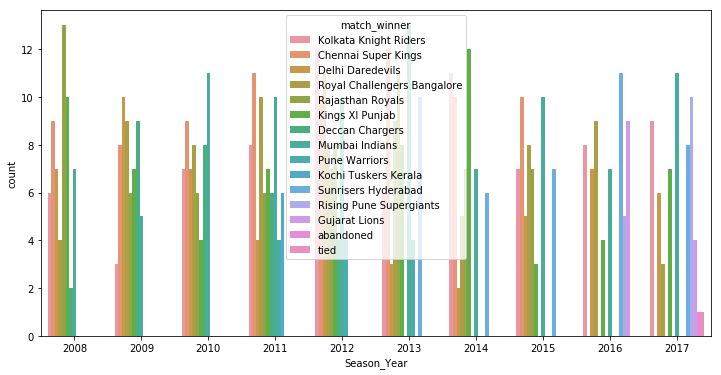

In [17]:
# Countplot of Yearwise match winner
plt.figure(figsize=(12,6))
sns.countplot(x='Season_Year',data=df,hue='match_winner')

In [18]:
df.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


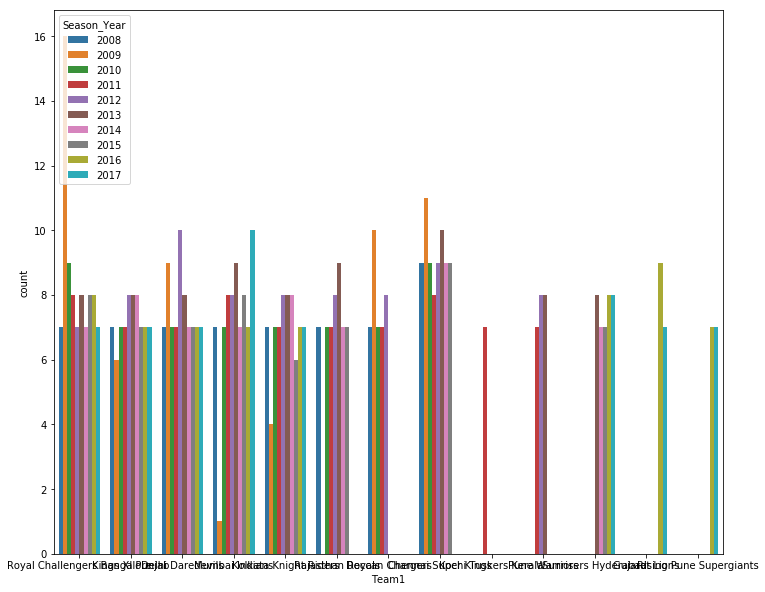

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(x='Team1',data=df,hue='Season_Year')

In [20]:
df['Win_Type'].value_counts()

wickets      339
runs         286
Tie            6
NO Result      3
run            1
Name: Win_Type, dtype: int64

In [21]:
df[(df['Win_Type']=='runs') & (df['Season_Year']==2017)].groupby('Win_Type').count()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Outcome_Type,ManOfMach,Win_Margin,Country_id
Win_Type,,,,,,,,,,,,,,,,
runs,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


Text(0.5, 1.0, 'Year wise Plot')

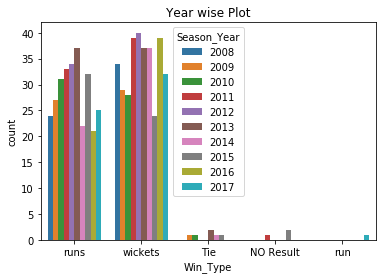

In [22]:
sns.countplot(x='Win_Type',hue='Season_Year',data=df)
plt.title('Year wise Plot')

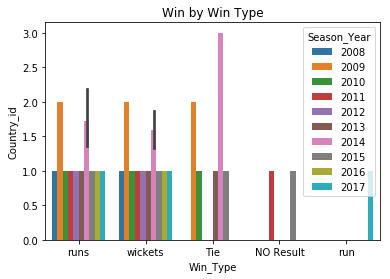

In [23]:
# winning result by win type
plt.title('Win by Win Type')
sns.barplot(x='Win_Type',y='Country_id',data=df,hue='Season_Year')

In [24]:
df[df['City_Name']=='Kolkata'].groupby('Season_Year').count()

,Match_SK,match_id,Team1,Team2,match_date,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
Season_Year,,,,,,,,,,,,,,,,
2008,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2010,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2011,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2012,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2013,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2014,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2016,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2017,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [25]:
df.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1


In [26]:
list=[]
for i in df['Season_Year']:
    list.append(i)

list=set(list)  
print(list)

{2016, 2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [27]:
# No of matches played with other teams
df[df['Team1']=='Mumbai Indians']['Team2'].value_counts()

Kolkata Knight Riders          10
Rajasthan Royals                9
Kings XI Punjab                 9
Delhi Daredevils                9
Chennai Super Kings             8
Royal Challengers Bangalore     8
Sunrisers Hyderabad             5
Rising Pune Supergiants         4
Deccan Chargers                 4
Pune Warriors                   3
Gujarat Lions                   2
Kochi Tuskers Kerala            1
Name: Team2, dtype: int64

In [28]:
# No of matches plyed in 2015 
df[(df['Team1']=='Mumbai Indians') &(df['Season_Year']==2015)][['Team2','match_winner']]

,Team2,match_winner
464,Kings XI Punjab,Kings XI Punjab
470,Chennai Super Kings,Chennai Super Kings
481,Sunrisers Hyderabad,Mumbai Indians
489,Rajasthan Royals,Mumbai Indians
496,Delhi Daredevils,Mumbai Indians
502,Royal Challengers Bangalore,Royal Challengers Bangalore
507,Kolkata Knight Riders,Mumbai Indians
516,Chennai Super Kings,Mumbai Indians


In [29]:
new=df[(df['Team1']=='Mumbai Indians') &(df['Season_Year']==2017)][['Team2','match_winner']].groupby('match_winner').groups

In [30]:
new

{'Kings XI Punjab': Int64Index([627], dtype='int64'),
 'Mumbai Indians': Int64Index([583, 586, 592, 600, 614, 635, 636], dtype='int64'),
 'Rising Pune Supergiants': Int64Index([604, 633], dtype='int64')}

In [31]:
len(new['Mumbai Indians'])

7

In [32]:
new=df[(df['Team1']=='Mumbai Indians') &(df['Season_Year']==2017)][['Team2','match_winner']]

In [33]:
new

,Team2,match_winner
583,Kolkata Knight Riders,Mumbai Indians
586,Sunrisers Hyderabad,Mumbai Indians
592,Gujarat Lions,Mumbai Indians
600,Delhi Daredevils,Mumbai Indians
604,Rising Pune Supergiants,Rising Pune Supergiants
614,Royal Challengers Bangalore,Mumbai Indians
627,Kings XI Punjab,Kings XI Punjab
633,Rising Pune Supergiants,Rising Pune Supergiants
635,Kolkata Knight Riders,Mumbai Indians
636,Rising Pune Supergiants,Mumbai Indians


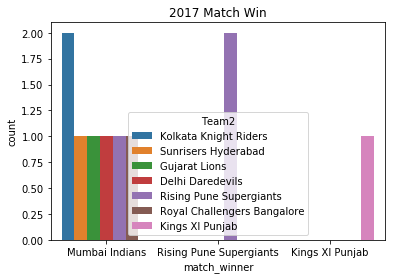

In [34]:
# Total matches win in year 2017
plt.title('2017 Match Win')
sns.countplot(x='match_winner',data=new,hue='Team2')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292BE52ADA0>,
      dtype=object)

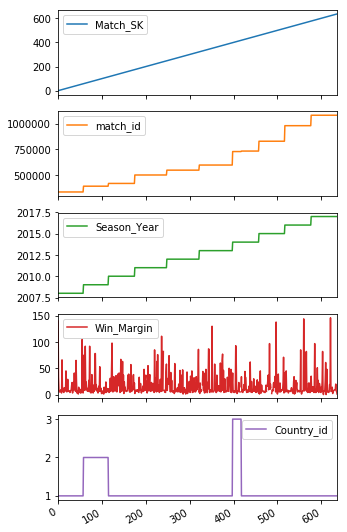

In [35]:
df.plot(subplots=True,figsize=(5,10))

(array([115., 133., 150., 119., 120.]),
 array([2008. , 2009.8, 2011.6, 2013.4, 2015.2, 2017. ]),
 <a list of 5 Patch objects>)

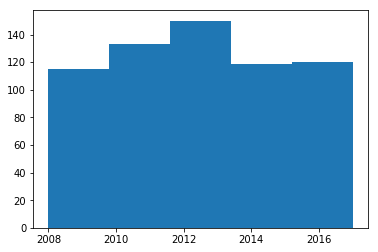

In [36]:
plt.hist(x='Season_Year',data=df,bins=5)